In [60]:
import glob
import os

import tensorflow as tf
from tensorflow.core.util import event_pb2
from matplotlib import pyplot as plt
import numpy as np

In [61]:
def get_section_results(file):
    """
    Extracts training environment steps and average return from TensorBoard summary files.

    Args:
        file (str): Path to the TensorBoard summary file.

    Returns:
        tuple: Two lists containing environment steps and average returns.
    """
    X = []
    Y = []

    # Create a TFRecordDataset to read the event file
    dataset = tf.data.TFRecordDataset(file)

    for raw_record in dataset:
        event = event_pb2.Event.FromString(raw_record.numpy())
        for value in event.summary.value:
            if value.tag == "Train_EnvstepsSoFar" and value.HasField("simple_value"):
                X.append(value.simple_value)
            elif value.tag == "Train_AverageReturn" and value.HasField("simple_value"):
                Y.append(value.simple_value)

        # Break if we have more than 120 entries in X
        if len(X) > 120:
            break

    return X, Y

In [62]:
dqn_logs = os.path.join(os.getcwd(), "data/q1_dqn*/events*")
dqn_event_files = glob.glob(dqn_logs)
ddqn_logs = os.path.join(os.getcwd(), "data/q1_doubledqn*/events*")
ddqn_event_files = glob.glob(ddqn_logs)

In [63]:
dqn_steps = []
dqn_returns = []

for file in dqn_event_files:
    X, Y = get_section_results(file)
    length = min(len(X), len(Y))
    X = X[-length:]
    Y = Y[-length:]
    dqn_steps.append(X)
    dqn_returns.append(Y)

dqn_steps = dqn_steps[0]
dqn_std = np.std(dqn_returns, axis=0)
dqn_returns = [sum(x) / len(x) for x in zip(*dqn_returns)]

In [64]:
ddqn_steps = []
ddqn_returns = []

for file in ddqn_event_files:
    X, Y = get_section_results(file)
    length = min(len(X), len(Y))
    X = X[-length:]
    Y = Y[-length:]
    ddqn_steps.append(X)
    ddqn_returns.append(Y)

ddqn_steps = ddqn_steps[0]
ddqn_std = np.std(ddqn_returns, axis=0)
ddqn_returns = [sum(x) / len(x) for x in zip(*ddqn_returns)]

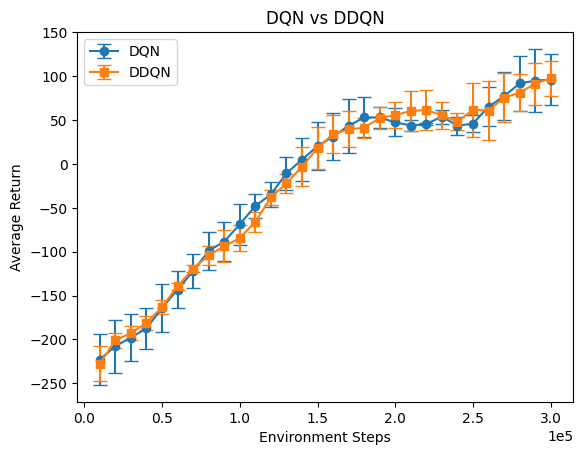

In [68]:
# there should be one line for DQN and one line for DDQN on the same plot, each with error bars)

plt.errorbar(dqn_steps, dqn_returns, yerr=dqn_std, fmt="-o", label="DQN", capsize=5)
plt.errorbar(ddqn_steps, ddqn_returns, yerr=ddqn_std, fmt="-s", label="DDQN", capsize=5)
plt.xlabel("Environment Steps")
plt.ylabel("Average Return")
plt.title("DQN vs DDQN")
plt.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
plt.legend()
plt.savefig("figs/Q1.png")
plt.show()